In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
sns.set_style('darkgrid')

In [2]:
# import data
data = pd.read_csv("Admission_Predict.csv")

In [3]:
# explore dataset

In [4]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
# dropna
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 31.2 KB


In [7]:
# no missing values
# change data type

In [8]:
data['University Rating'] = data['University Rating'].astype('object')
data['SOP'] = data['SOP'].astype('object')
data['LOR'] = data['LOR '].astype('object')
data['Research'] = data['Research'].astype('object')
data['Chance of Admit'] = data['Chance of Admit ']
data.drop(['LOR ','Chance of Admit '],inplace=True, axis=1)

In [9]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,CGPA,Research,LOR,Chance of Admit
0,1,337,118,4,4.5,9.65,1,4.5,0.92
1,2,324,107,4,4,8.87,1,4.5,0.76
2,3,316,104,3,3,8.00,1,3.5,0.72
3,4,322,110,3,3.5,8.67,1,2.5,0.80
4,5,314,103,2,2,8.21,0,3,0.65


In [10]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,CGPA,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,8.598925,0.724350
std,115.614301,11.473646,6.069514,0.596317,0.142609
min,1.000000,290.000000,92.000000,6.800000,0.340000
25%,100.750000,308.000000,103.000000,8.170000,0.640000
50%,200.500000,317.000000,107.000000,8.610000,0.730000
75%,300.250000,325.000000,112.000000,9.062500,0.830000
max,400.000000,340.000000,120.000000,9.920000,0.970000


In [11]:
data.describe(include='object')

,University Rating,SOP,Research,LOR
count,400,400.0,400,400.0
unique,5,9.0,2,9.0
top,3,4.0,1,3.0
freq,133,70.0,219,85.0


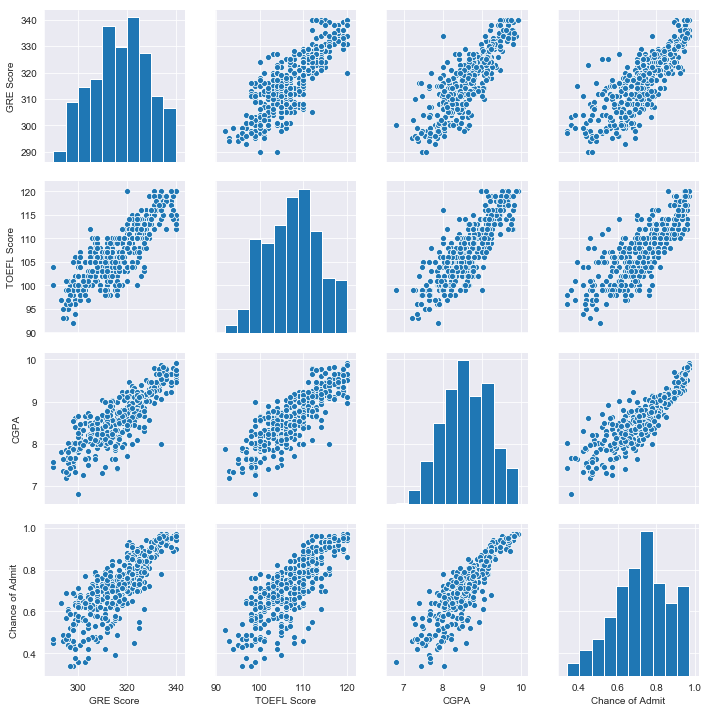

In [12]:
# pairplot
sns.pairplot(data[['GRE Score','TOEFL Score','CGPA','Chance of Admit']]);

In [13]:
# high correlaton between chance of admit and GRE Score, TOEFL Score, CGPA

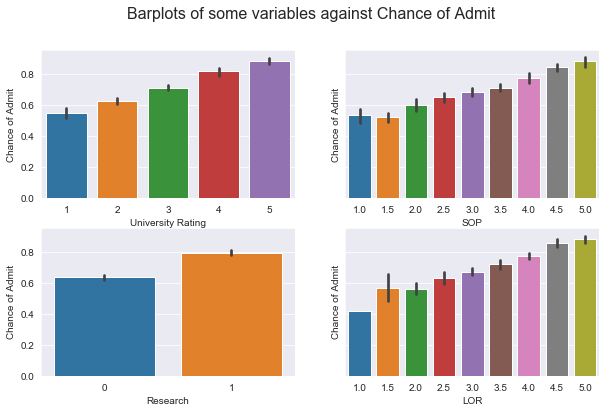

In [14]:
# barplot
fig, ax = plt.subplots(2,2,sharey=True,figsize=(10,6))
cnt = 0
df_temp = data[['University Rating','SOP','Research','LOR']]
for i in range(2):
    for j in range(2):
        sns.barplot(df_temp.columns[cnt], 'Chance of Admit', data=data, ax=ax[i,j])
        cnt+=1
fig.suptitle('Barplots of some variables against Chance of Admit', fontsize=16);         

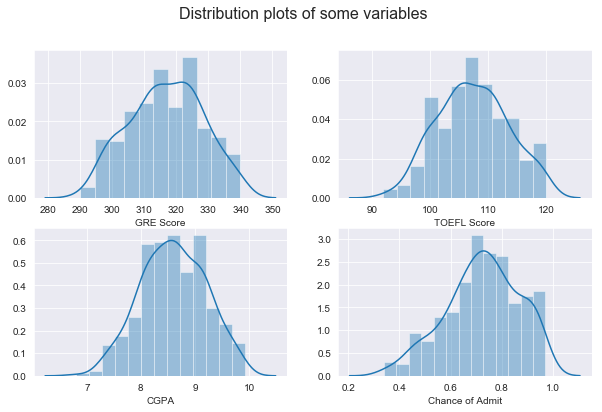

In [15]:
# distplot
fig, ax = plt.subplots(2,2,figsize=(10,6))
cnt = 0
df_temp = data[['GRE Score','TOEFL Score','CGPA','Chance of Admit']]
for i in range(2):
    for j in range(2):
        sns.distplot(df_temp.iloc[:,cnt], ax=ax[i,j])
        cnt+=1
fig.suptitle('Distribution plots of some variables', fontsize=16);      

In [16]:
# can be assumed to be normally distributed 

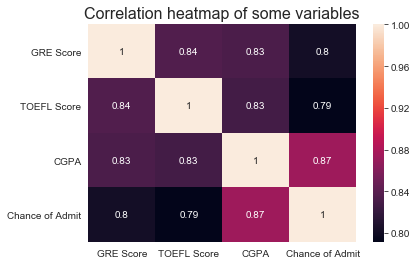

In [17]:
# heatmap with correlation values
sns.heatmap(data[['GRE Score','TOEFL Score','CGPA','Chance of Admit']].corr(),annot=True);
plt.title('Correlation heatmap of some variables', fontsize=16); 